<a href="https://colab.research.google.com/github/hanwo-ol/python_202601_lecture/blob/main/Day09_15_seaborn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn 내장 데이터셋을 활용한 탐색적 데이터 분석(EDA)

Seaborn 라이브러리는 통계 그래픽 생성을 위한 다양한 내장 데이터셋을 제공합니다. 별도의 외부 파일 로드 없이 `load_dataset` 메소드를 통해 즉시 데이터프레임 형태로 불러올 수 있습니다.

## 1. 내장 데이터셋 목록 확인 및 로드
현재 Seaborn에서 제공하는 전체 데이터셋 명단을 확인하고 데이터를 불러오는 기본 방법입니다.

In [1]:
import seaborn as sns
import pandas as pd

# 제공되는 모든 데이터셋 이름 출력
dataset_names = sns.get_dataset_names()
print(dataset_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
# 특정 데이터셋 로드 (예: tips)
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## 2. 주요 내장 데이터셋 상세 정보
분석 목적에 따라 자주 사용되는 대표적인 데이터셋들은 다음과 같습니다.

| 데이터셋 명 | 주요 컬럼 구성 | 분석 적합도 |
| :--- | :--- | :--- |
| **tips** | total_bill, tip, sex, smoker, day, time, size | 회귀 분석, 범주형 데이터 분석 |
| **iris** | sepal_length, sepal_width, petal_length, petal_width, species | 분류(Classification), 군집화 |
| **titanic** | survived, pclass, sex, age, fare, embarked, deck | 결측치 처리, 생존 예측, 범주형 분석 |
| **penguins** | species, island, bill_length_mm, flipper_length_mm, body_mass_g | 다변량 분석, 데이터 정제 실습 |
| **flights** | year, month, passengers | 시계열 분석, 히트맵(Heatmap) 시각화 |
| **planets** | method, number, orbital_period, mass, distance, year | 대규모 데이터, 결측치 탐지 |
| **diamonds** | carat, cut, color, clarity, depth, table, price, x, y, z | 대량의 수치형 및 범주형 복합 분석 |

## 3. 데이터셋별 EDA 실무 적용

### 3.1 수치형 및 범주형 복합 분석 (tips)
식당 지불 금액과 팁의 관계를 성별, 요일별로 분석합니다.


<Axes: xlabel='day', ylabel='tip'>

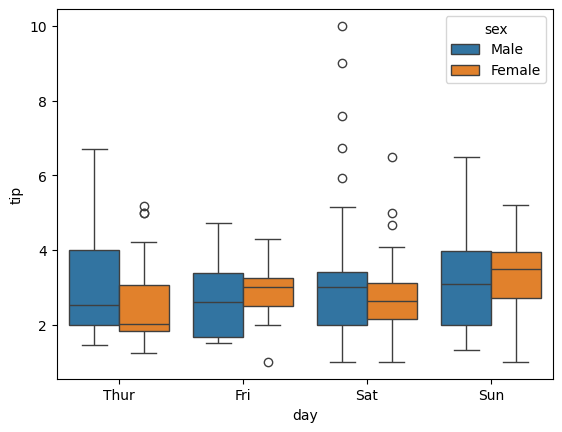

In [3]:
tips = sns.load_dataset('tips')

# 요일별 팁의 평균과 분포 확인 (Boxplot)
sns.boxplot(data=tips, x='day', y='tip', hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

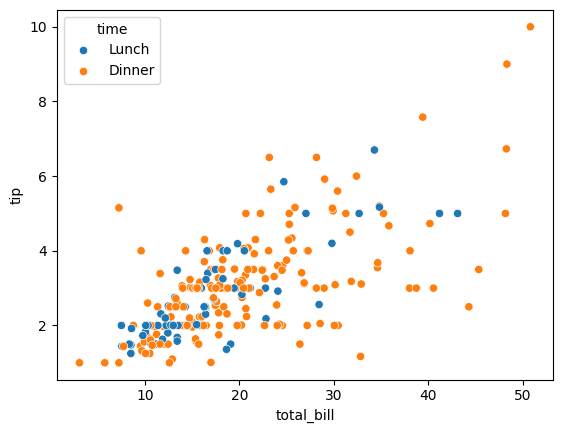

In [4]:
# 식사 금액과 팁의 상관관계 (Scatterplot)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

### 3.2 다변량 데이터의 분포 및 관계 분석 (penguins)
펭귄의 신체 특징 데이터를 통해 종별 차이를 분석합니다. `iris` 데이터셋의 현대적 대안으로 사용됩니다.


In [5]:
penguins = sns.load_dataset('penguins')

# 결측치 확인
print(penguins.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


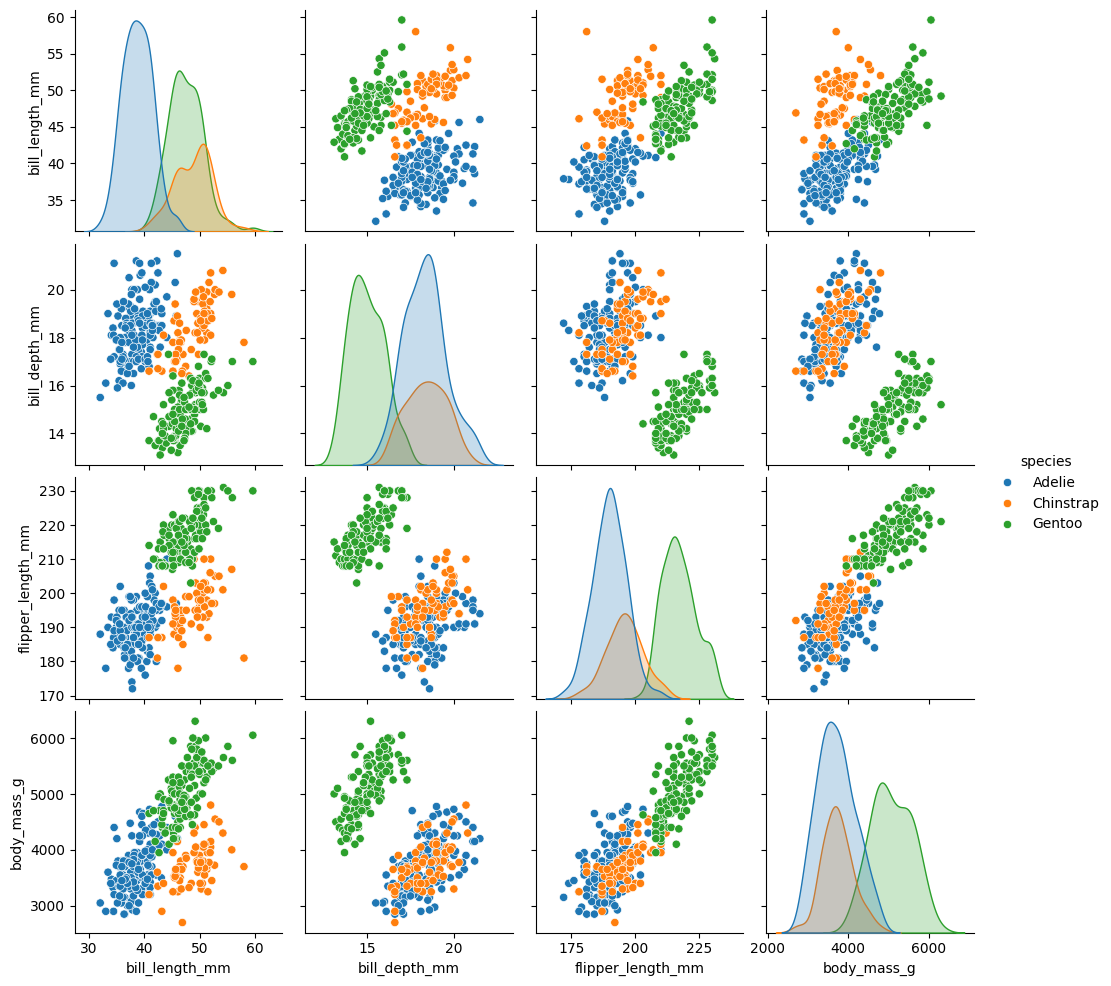

In [6]:
# 모든 수치형 변수 간의 관계 시각화 (Pairplot)
sns.pairplot(data=penguins, hue='species')


### 3.3 시계열 데이터의 재구조화 및 시각화 (flights)
연도와 월별 승객 수를 히트맵으로 표현하기 위해 피벗 테이블을 생성합니다.


/tmp/ipython-input-1647326546.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers')


<Axes: xlabel='year', ylabel='month'>

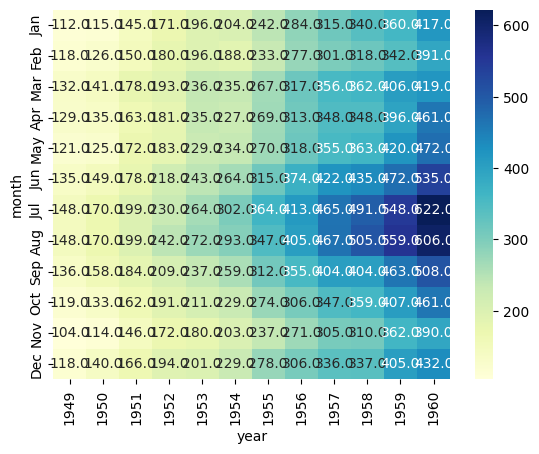

In [9]:
flights = sns.load_dataset('flights')

# 데이터프레임을 피벗 테이블로 변환 (행: 월, 열: 연도, 값: 승객 수)
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers')

# 히트맵 시각화
sns.heatmap(flights_pivot, annot=True,
            fmt='.1f', cmap='YlGnBu')

<Axes: xlabel='year', ylabel='month'>

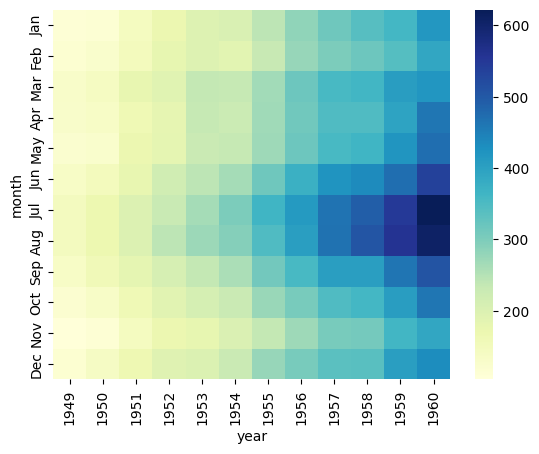

In [10]:
# 히트맵 시각화, 숫자없애고 색만
sns.heatmap(flights_pivot, annot=False,
            fmt='.1f', cmap='YlGnBu')

### 3.4 결측치 및 범주형 데이터 처리 (titanic)
생존자 분석을 위해 데이터를 정제하고 빈도를 확인합니다.

In [11]:
titanic = sns.load_dataset('titanic')

# 객실 등급(pclass)별 생존율 분석
survival_rate = titanic.groupby('pclass')['survived'].mean()
survival_rate

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='pclass', ylabel='count'>

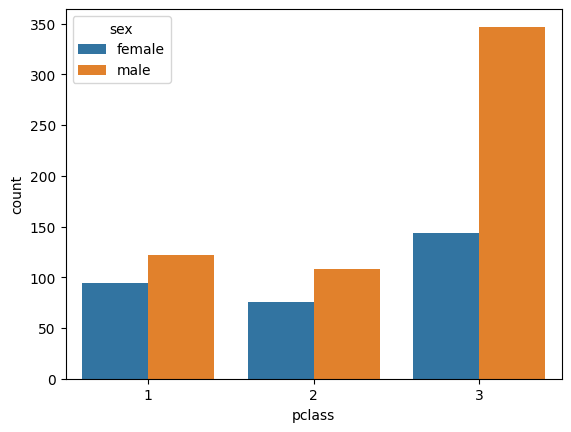

In [12]:
# 성별 및 등급별 생존자 빈도 (Countplot)
sns.countplot(data=titanic, x='pclass', hue='sex')

## 4. EDA를 위한 Seaborn 주요 메소드 요약

### 4.1 분포 시각화 (Distribution)
- `histplot()`: 히스토그램을 통한 데이터 분포 확인
- `kdeplot()`: 커널 밀도 추정 곡선 확인
- `rugplot()`: 데이터 포인트의 위치를 축에 표시

### 4.2 관계 시각화 (Relational)
- `scatterplot()`: 두 변수 간의 산점도
- `lineplot()`: 시간이나 순서에 따른 경향성

### 4.3 범주형 시각화 (Categorical)
- `barplot()`: 범주별 평균 및 신뢰구간 표시
- `boxplot()`: 사분위수 및 이상치 확인
- `violinplot()`: 분포의 밀도와 사분위수를 동시에 표시
- `stripplot()` / `swarmplot()`: 범주별 개별 데이터 포인트 표시

### 4.4 회귀 및 행렬 시각화 (Regression & Matrix)
- `regplot()`: 산점도와 선형 회귀선 표시
- `heatmap()`: 데이터 행렬을 색상으로 표현

## 5. 실습용 코드 통합 예시
데이터 로드부터 기초 통계 확인, 시각화 준비까지의 과정입니다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     4

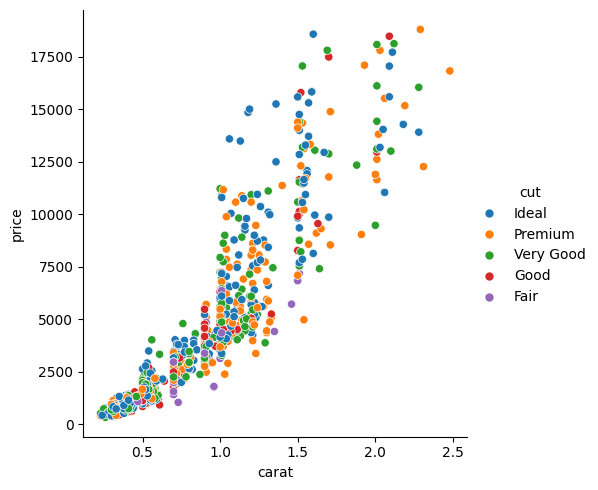

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = sns.load_dataset('diamonds')

# 1. 데이터 구조 확인
print(df.info())

# 2. 수치형 데이터 요약
print(df.describe())

# 3. 범주형 데이터 빈도 확인
print(df['cut'].value_counts())

# 4. 상관계수 행렬 계산
corr = df.select_dtypes(include=['float64', 'int64']).corr()
print(corr)

# 5. 시각화 예시 (캐럿 대비 가격, 커팅 상태에 따른 구분)
sns.relplot(data=df.sample(1000), x='carat', y='price', hue='cut', kind='scatter')
plt.show()